In [10]:
import pandas as pd

In [11]:
df=pd.read_excel('家用电器2024area.xlsx')
df

symbol shortname  year  week_of_year  week_start_day  sum_amount  \
0         16      深康佳A  2021            53        20201228      904.00   
1         16      深康佳A  2021             1        20210104     5191.64   
2         16      深康佳A  2021             2        20210111     3168.40   
3         16      深康佳A  2021             3        20210118     2437.30   
4         16      深康佳A  2021             4        20210125     2004.40   
...      ...       ...   ...           ...             ...         ...   
3108  603868      飞科电器  2023            49        20231204   158528.96   
3109  603868      飞科电器  2023            50        20231211   156433.41   
3110  603868      飞科电器  2023            51        20231218   181223.04   
3111  603868      飞科电器  2023            52        20231225   152628.97   
3112  603868      飞科电器  2024             1        20240101   136792.76   

      sum_quantity  sum_bill  
0               18        18  
1               60        57  
2               63        62  
3               47        46  
4               41        40  
...            ...       ...  
3108          2896      1528  
3109          2875      1463  
3110          3123      1593  
3111          3403      1456  
3112          3227      1361  

[3113 rows x 8 columns]

In [12]:
df.columns

Index(['symbol', 'shortname', 'year', 'week_of_year', 'week_start_day',
       'sum_amount', 'sum_quantity', 'sum_bill'],
      dtype='object')

# 以周为单位聚合

In [13]:
data=df.groupby(['symbol', 'week_start_day']).agg({
    'shortname': 'first',
    'week_of_year': 'first',
    'sum_amount': 'sum',
    'sum_quantity': 'sum',
    'sum_bill': 'sum'
}).reset_index().sort_values(by=['symbol', 'week_start_day'], ascending=True)
data['week_start_day'] = pd.to_datetime(data['week_start_day'], format='%Y%m%d')
data

symbol week_start_day shortname  week_of_year  sum_amount  sum_quantity  \
0         16     2020-12-28      深康佳A            53      904.00            18   
1         16     2021-01-04      深康佳A             1     5191.64            60   
2         16     2021-01-11      深康佳A             2     3168.40            63   
3         16     2021-01-18      深康佳A             3     2437.30            47   
4         16     2021-01-25      深康佳A             4     2004.40            41   
...      ...            ...       ...           ...         ...           ...   
3072  603868     2023-12-04      飞科电器            49   158528.96          2896   
3073  603868     2023-12-11      飞科电器            50   156433.41          2875   
3074  603868     2023-12-18      飞科电器            51   181223.04          3123   
3075  603868     2023-12-25      飞科电器            52   152628.97          3403   
3076  603868     2024-01-01      飞科电器             1   136792.76          3227   

      sum_bill  
0           18  
1           57  
2           62  
3           46  
4           40  
...        ...  
3072      1528  
3073      1463  
3074      1593  
3075      1456  
3076      1361  

[3077 rows x 7 columns]

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15)#字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#设置中文字体
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 筛选有158周数据的企业

In [15]:
all_dates = data['week_start_day'].unique()
symbols = data['symbol'].unique()
symbols

array([    16,    333,    521,    541,    651,    810,    921,   1259,
         2032,   2035,   2242,   2403,   2543,   2705,   2723, 600336,
       600683, 600690, 603215, 603355, 603486, 603515, 603868],
      dtype=int64)

In [16]:
for symbol in symbols:
    symbol_data = data[data['symbol'] == symbol]
    symbol_dates = symbol_data['week_start_day']
    missing_num = len(set(all_dates) - set(symbol_dates))
    if missing_num!=0:
        symbols=np.delete(symbols, np.where(symbols==symbol))
symbols

array([    16,    333,    521,    921,   2032,   2242,   2403,   2543,
         2723, 603515, 603868], dtype=int64)

In [17]:
data

symbol week_start_day shortname  week_of_year  sum_amount  sum_quantity  \
0         16     2020-12-28      深康佳A            53      904.00            18   
1         16     2021-01-04      深康佳A             1     5191.64            60   
2         16     2021-01-11      深康佳A             2     3168.40            63   
3         16     2021-01-18      深康佳A             3     2437.30            47   
4         16     2021-01-25      深康佳A             4     2004.40            41   
...      ...            ...       ...           ...         ...           ...   
3072  603868     2023-12-04      飞科电器            49   158528.96          2896   
3073  603868     2023-12-11      飞科电器            50   156433.41          2875   
3074  603868     2023-12-18      飞科电器            51   181223.04          3123   
3075  603868     2023-12-25      飞科电器            52   152628.97          3403   
3076  603868     2024-01-01      飞科电器             1   136792.76          3227   

      sum_bill  
0           18  
1           57  
2           62  
3           46  
4           40  
...        ...  
3072      1528  
3073      1463  
3074      1593  
3075      1456  
3076      1361  

[3077 rows x 7 columns]

In [18]:
df=data[data['symbol'].isin(symbols)]
df

symbol week_start_day shortname  week_of_year  sum_amount  sum_quantity  \
0         16     2020-12-28      深康佳A            53      904.00            18   
1         16     2021-01-04      深康佳A             1     5191.64            60   
2         16     2021-01-11      深康佳A             2     3168.40            63   
3         16     2021-01-18      深康佳A             3     2437.30            47   
4         16     2021-01-25      深康佳A             4     2004.40            41   
...      ...            ...       ...           ...         ...           ...   
3072  603868     2023-12-04      飞科电器            49   158528.96          2896   
3073  603868     2023-12-11      飞科电器            50   156433.41          2875   
3074  603868     2023-12-18      飞科电器            51   181223.04          3123   
3075  603868     2023-12-25      飞科电器            52   152628.97          3403   
3076  603868     2024-01-01      飞科电器             1   136792.76          3227   

      sum_bill  
0           18  
1           57  
2           62  
3           46  
4           40  
...        ...  
3072      1528  
3073      1463  
3074      1593  
3075      1456  
3076      1361  

[1738 rows x 7 columns]

# 原序列画图

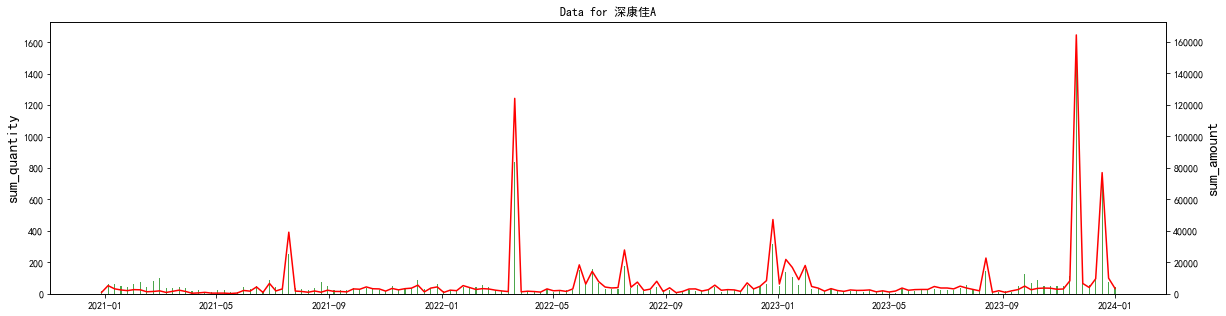

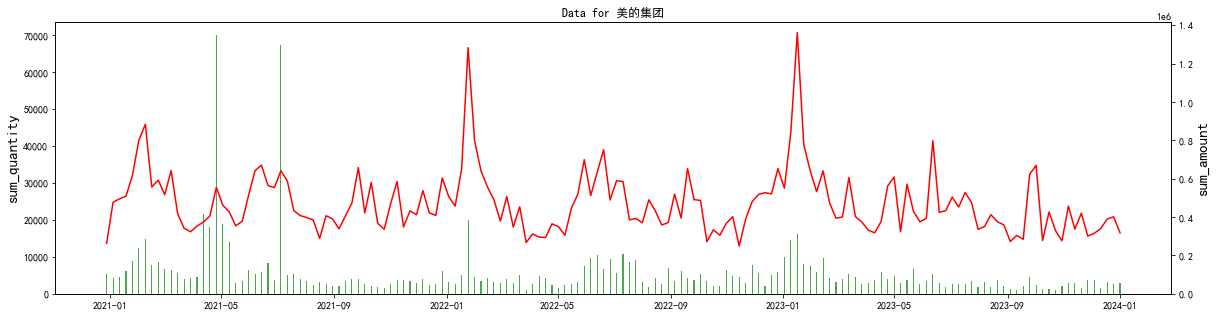

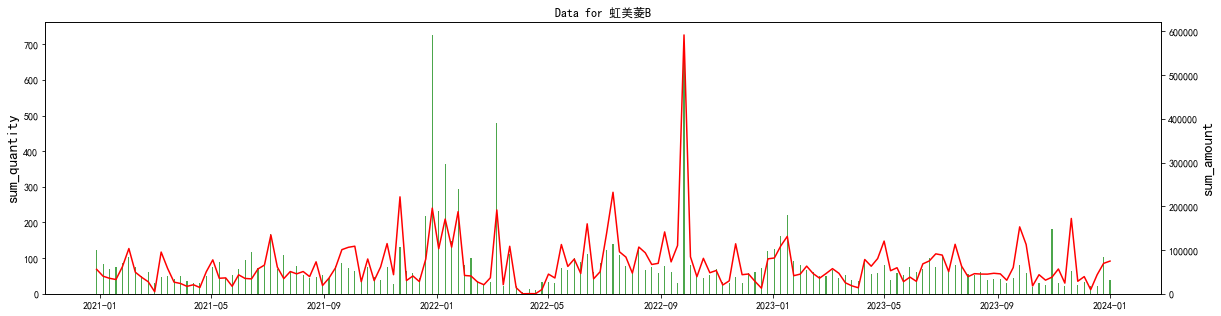

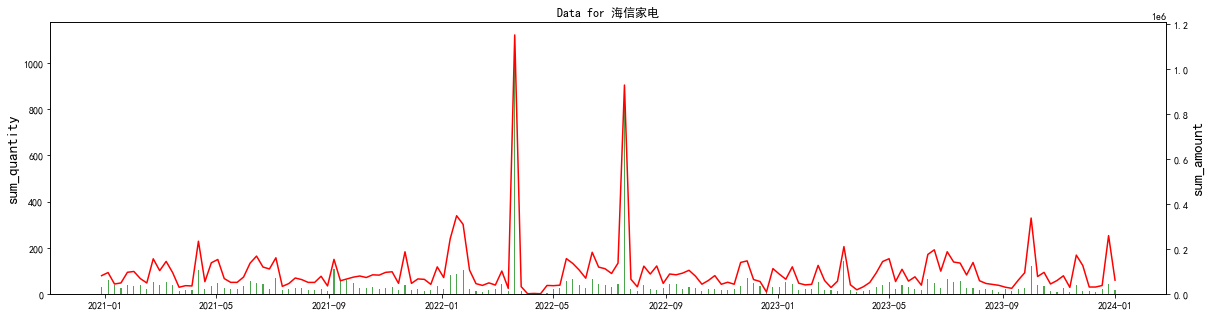

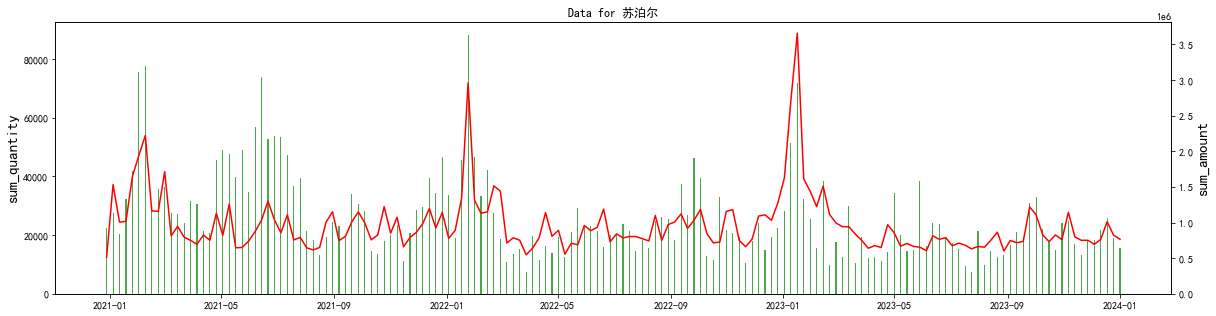

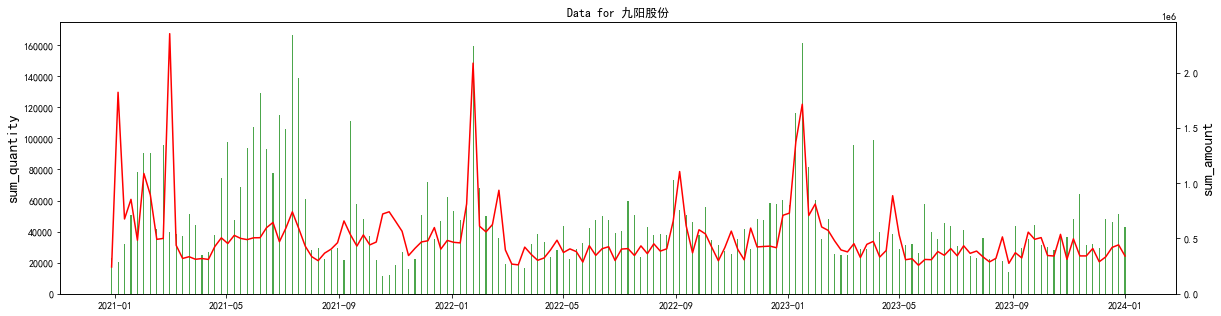

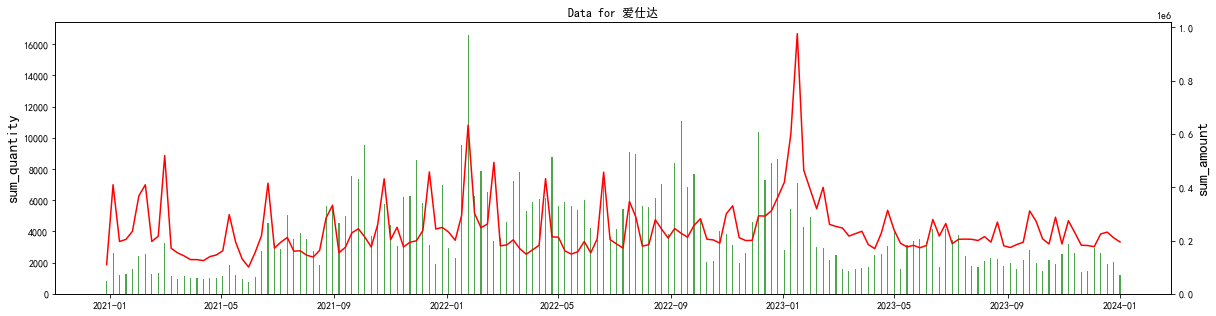

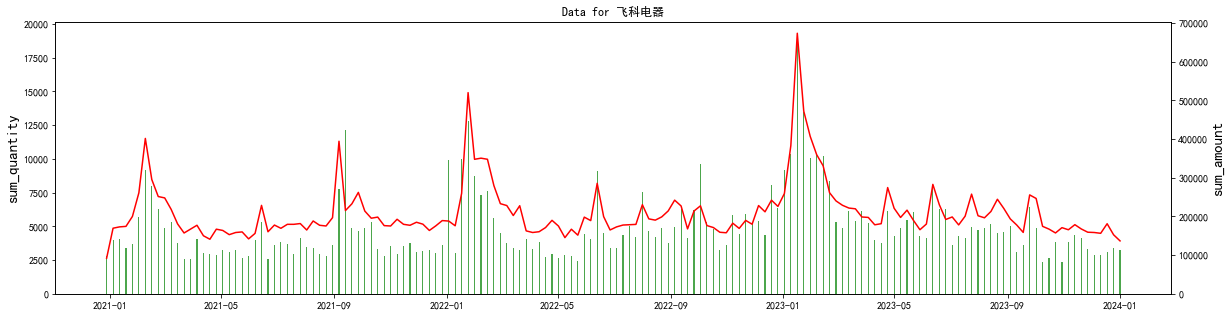

In [19]:
import seaborn as sns
shortnames = df['shortname'].unique()

for shortname in shortnames:
    symbol_data = df[df['shortname'] == shortname]
    plt.rcParams['figure.figsize'] = (20,5)
    fig = plt.figure()
    #画柱形图
    ax1 = fig.add_subplot(111)
    ax1.bar(symbol_data.to_numpy().T[1], symbol_data.to_numpy().T[5],label='sum_quantity',alpha=.7,color='g',width=1.2)
    ax1.set_ylabel('sum_quantity',fontsize='15')
    #ax1.set_title('数据统计',fontsize='20')
    #画折线图
    ax2 = ax1.twinx() #组合图必须加这个
    ax2.plot(symbol_data.to_numpy().T[1], symbol_data.to_numpy().T[4], label='sum_amount',color= 'r')
    ax2.set_ylabel('sum_amount',fontsize='15')
    ax2.set_ylim(bottom=0)
#     plt.subplots_adjust(wspace=0.3) 
    plt.title(f'Data for {shortname}')
    plt.xlabel('week_start_day')
    plt.xticks(rotation=45)
    plt.show()
    

# 添加门店信息,计算平均值

In [20]:
shop=pd.read_excel('门店个数.xlsx')
shop

week_start_day  count_ep  count_shop    sum_area
0       2020-12-28        61        1959  1785231.25
1       2021-01-04        63        1984  1834909.25
2       2021-01-11        62        1989  1844122.25
3       2021-01-18        62        2001  1855153.25
4       2021-01-25        62        2013  1861787.25
..             ...       ...         ...         ...
153     2023-12-04        81        2723  2810535.38
154     2023-12-11        80        2701  2781926.37
155     2023-12-18        77        2663  2804205.48
156     2023-12-25        72        2622  2698502.46
157     2024-01-01        72        2612  2716393.10

[158 rows x 4 columns]

In [21]:
df_avg=pd.merge(left=df, right=shop, left_on='week_start_day', right_on='week_start_day', how='left')

df_avg['area_sum_amount']=df_avg['sum_amount']/df_avg['sum_area']
df_avg['area_sum_quantity']=df_avg['sum_quantity']/df_avg['sum_area']
df_avg['area_sum_bill']=df_avg['sum_bill']/df_avg['sum_area']
df_avg

symbol week_start_day shortname  week_of_year  sum_amount  sum_quantity  \
0         16     2020-12-28      深康佳A            53      904.00            18   
1         16     2021-01-04      深康佳A             1     5191.64            60   
2         16     2021-01-11      深康佳A             2     3168.40            63   
3         16     2021-01-18      深康佳A             3     2437.30            47   
4         16     2021-01-25      深康佳A             4     2004.40            41   
...      ...            ...       ...           ...         ...           ...   
1733  603868     2023-12-04      飞科电器            49   158528.96          2896   
1734  603868     2023-12-11      飞科电器            50   156433.41          2875   
1735  603868     2023-12-18      飞科电器            51   181223.04          3123   
1736  603868     2023-12-25      飞科电器            52   152628.97          3403   
1737  603868     2024-01-01      飞科电器             1   136792.76          3227   

      sum_bill  count_ep  count_shop    sum_area  area_sum_amount  \
0           18        61        1959  1785231.25         0.000506   
1           57        63        1984  1834909.25         0.002829   
2           62        62        1989  1844122.25         0.001718   
3           46        62        2001  1855153.25         0.001314   
4           40        62        2013  1861787.25         0.001077   
...        ...       ...         ...         ...              ...   
1733      1528        81        2723  2810535.38         0.056405   
1734      1463        80        2701  2781926.37         0.056232   
1735      1593        77        2663  2804205.48         0.064625   
1736      1456        72        2622  2698502.46         0.056561   
1737      1361        72        2612  2716393.10         0.050358   

      area_sum_quantity  area_sum_bill  
0              0.000010       0.000010  
1              0.000033       0.000031  
2              0.000034       0.000034  
3              0.000025       0.000025  
4              0.000022       0.000021  
...                 ...            ...  
1733           0.001030       0.000544  
1734           0.001033       0.000526  
1735           0.001114       0.000568  
1736           0.001261       0.000540  
1737           0.001188       0.000501  

[1738 rows x 13 columns]

In [22]:
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   symbol             1738 non-null   int64         
 1   week_start_day     1738 non-null   datetime64[ns]
 2   shortname          1738 non-null   object        
 3   week_of_year       1738 non-null   int64         
 4   sum_amount         1738 non-null   float64       
 5   sum_quantity       1738 non-null   int64         
 6   sum_bill           1738 non-null   int64         
 7   count_ep           1738 non-null   int64         
 8   count_shop         1738 non-null   int64         
 9   sum_area           1738 non-null   float64       
 10  area_sum_amount    1738 non-null   float64       
 11  area_sum_quantity  1738 non-null   float64       
 12  area_sum_bill      1738 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(6), object(1)
memory us

# 环比

In [23]:
df_avg

symbol week_start_day shortname  week_of_year  sum_amount  sum_quantity  \
0         16     2020-12-28      深康佳A            53      904.00            18   
1         16     2021-01-04      深康佳A             1     5191.64            60   
2         16     2021-01-11      深康佳A             2     3168.40            63   
3         16     2021-01-18      深康佳A             3     2437.30            47   
4         16     2021-01-25      深康佳A             4     2004.40            41   
...      ...            ...       ...           ...         ...           ...   
1733  603868     2023-12-04      飞科电器            49   158528.96          2896   
1734  603868     2023-12-11      飞科电器            50   156433.41          2875   
1735  603868     2023-12-18      飞科电器            51   181223.04          3123   
1736  603868     2023-12-25      飞科电器            52   152628.97          3403   
1737  603868     2024-01-01      飞科电器             1   136792.76          3227   

      sum_bill  count_ep  count_shop    sum_area  area_sum_amount  \
0           18        61        1959  1785231.25         0.000506   
1           57        63        1984  1834909.25         0.002829   
2           62        62        1989  1844122.25         0.001718   
3           46        62        2001  1855153.25         0.001314   
4           40        62        2013  1861787.25         0.001077   
...        ...       ...         ...         ...              ...   
1733      1528        81        2723  2810535.38         0.056405   
1734      1463        80        2701  2781926.37         0.056232   
1735      1593        77        2663  2804205.48         0.064625   
1736      1456        72        2622  2698502.46         0.056561   
1737      1361        72        2612  2716393.10         0.050358   

      area_sum_quantity  area_sum_bill  
0              0.000010       0.000010  
1              0.000033       0.000031  
2              0.000034       0.000034  
3              0.000025       0.000025  
4              0.000022       0.000021  
...                 ...            ...  
1733           0.001030       0.000544  
1734           0.001033       0.000526  
1735           0.001114       0.000568  
1736           0.001261       0.000540  
1737           0.001188       0.000501  

[1738 rows x 13 columns]

In [24]:
def ratio(df,list_column):
    for column in list_column:
        column_name=column+'_ratio'
        df[column_name]=(df[column]-df[column].shift(1))/df[column].shift(1)

In [25]:
shortnames = df_avg['shortname'].unique()
data_final=pd.DataFrame()
for shortname in shortnames:
    symbol_data = df_avg[df_avg['shortname'] == shortname]
    ratio(symbol_data,['area_sum_amount', 'area_sum_quantity', 'area_sum_bill'])
    symbol_data=symbol_data.dropna()
    data_final=pd.concat([data_final, symbol_data], ignore_index=True)
data_final

symbol week_start_day shortname  week_of_year  sum_amount  sum_quantity  \
0         16     2021-01-04      深康佳A             1     5191.64            60   
1         16     2021-01-11      深康佳A             2     3168.40            63   
2         16     2021-01-18      深康佳A             3     2437.30            47   
3         16     2021-01-25      深康佳A             4     2004.40            41   
4         16     2021-02-01      深康佳A             5     2655.20            60   
...      ...            ...       ...           ...         ...           ...   
1722  603868     2023-12-04      飞科电器            49   158528.96          2896   
1723  603868     2023-12-11      飞科电器            50   156433.41          2875   
1724  603868     2023-12-18      飞科电器            51   181223.04          3123   
1725  603868     2023-12-25      飞科电器            52   152628.97          3403   
1726  603868     2024-01-01      飞科电器             1   136792.76          3227   

      sum_bill  count_ep  count_shop    sum_area  area_sum_amount  \
0           57        63        1984  1834909.25         0.002829   
1           62        62        1989  1844122.25         0.001718   
2           46        62        2001  1855153.25         0.001314   
3           40        62        2013  1861787.25         0.001077   
4           53        62        1979  1825671.67         0.001454   
...        ...       ...         ...         ...              ...   
1722      1528        81        2723  2810535.38         0.056405   
1723      1463        80        2701  2781926.37         0.056232   
1724      1593        77        2663  2804205.48         0.064625   
1725      1456        72        2622  2698502.46         0.056561   
1726      1361        72        2612  2716393.10         0.050358   

      area_sum_quantity  area_sum_bill  area_sum_amount_ratio  \
0              0.000033       0.000031               4.587481   
1              0.000034       0.000034              -0.392760   
2              0.000025       0.000025              -0.235321   
3              0.000022       0.000021              -0.180545   
4              0.000033       0.000029               0.350891   
...                 ...            ...                    ...   
1722           0.001030       0.000544               0.053145   
1723           0.001033       0.000526              -0.003071   
1724           0.001114       0.000568               0.149264   
1725           0.001261       0.000540              -0.124793   
1726           0.001188       0.000501              -0.109659   

      area_sum_quantity_ratio  area_sum_bill_ratio  
0                    2.243087             2.080933  
1                    0.044754             0.082285  
2                   -0.258404            -0.262476  
3                   -0.130768            -0.133533  
4                    0.492364             0.351211  
...                       ...                  ...  
1722                -0.086739             0.047044  
1723                 0.002958            -0.032693  
1724                 0.077631             0.080208  
1725                 0.132340            -0.050199  
1726                -0.057965            -0.071404  

[1727 rows x 16 columns]

In [26]:
data_final.to_excel('家用电器周度_avg.xlsx',index=False)

# 平稳性检验

In [27]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
def adf_result(data):
    # 对时间序列进行ADF测试
    result = adfuller(data)
    # 输出结果转化为DataFrame
    output_results = pd.DataFrame({
        'ADF Statistic': [result[0]],
        'P-Value': [result[1]],
        'Lags': [result[2]],
        'Observations': [result[3]]
    })

    # 添加临界值
    critical_values = result[4]
    for key, value in critical_values.items():
        output_results[f'{key}% Critical Value'] = value
    
    return output_results

In [28]:
data_final.columns

Index(['symbol', 'week_start_day', 'shortname', 'week_of_year', 'sum_amount',
       'sum_quantity', 'sum_bill', 'count_ep', 'count_shop', 'sum_area',
       'area_sum_amount', 'area_sum_quantity', 'area_sum_bill',
       'area_sum_amount_ratio', 'area_sum_quantity_ratio',
       'area_sum_bill_ratio'],
      dtype='object')

In [29]:
shortnames = data_final['shortname'].unique()
name=[]
for i in ['sum_amount','sum_quantity', 'sum_bill',
       'area_sum_amount', 'area_sum_quantity', 'area_sum_bill',
       'area_sum_amount_ratio','area_sum_quantity_ratio', 'area_sum_bill_ratio']:
    print(i)
    
    adf_data=pd.DataFrame()
    for shortname in shortnames:     
        symbol_data = data_final[data_final['shortname'] == shortname]
        result=adf_result(symbol_data[i])
        result['name']=shortname
        adf_data=pd.concat([adf_data, result], ignore_index=True)
    print(adf_data)
    # 筛选出'P-Value'小于0.05的行
    filtered_data = adf_data[adf_data['P-Value'] < 0.05]
    # 获取筛选后的'name'列
    names = filtered_data['name'].to_list()
    name.append(names)
    print("------------------------------------------------------------")
    print('\n')

sum_amount
    ADF Statistic       P-Value  Lags  Observations  1%% Critical Value  \
0       -4.549364  1.599671e-04     3           153           -3.473830   
1       -6.817146  2.045422e-09     0           156           -3.472979   
2      -10.503081  1.071438e-18     0           156           -3.472979   
3      -12.270463  8.664178e-23     0           156           -3.472979   
4       -6.408570  1.915914e-08     0           156           -3.472979   
5       -9.756189  7.778316e-17     0           156           -3.472979   
6       -7.861079  5.282246e-12     0           156           -3.472979   
7       -6.144408  7.830130e-08     1           155           -3.473259   
8       -4.440838  2.511463e-04     3           153           -3.473830   
9       -9.101370  3.598128e-15     0           156           -3.472979   
10      -5.249406  6.963987e-06     0           156           -3.472979   

    5%% Critical Value  10%% Critical Value  name  
0            -2.880623            -2

    ADF Statistic       P-Value  Lags  Observations  1%% Critical Value  \
0      -12.941309  3.529895e-24     0           156           -3.472979   
1       -9.573915  2.249834e-16     2           154           -3.473543   
2       -7.982764  2.596723e-12     1           155           -3.473259   
3      -12.652832  1.356602e-23     0           156           -3.472979   
4       -9.938065  2.710167e-17     2           154           -3.473543   
5      -12.728931  9.467797e-24     1           155           -3.473259   
6      -11.604653  2.598613e-21     2           154           -3.473543   
7       -4.265023  5.104152e-04     7           149           -3.475018   
8       -7.797564  7.645150e-12     2           154           -3.473543   
9      -12.236654  1.024504e-22     1           155           -3.473259   
10     -10.617887  5.613153e-19     1           155           -3.473259   

    5%% Critical Value  10%% Critical Value  name  
0            -2.880252            -2.576747  深康

In [30]:
# 初始化一个空集合，用于存储所有子列表的交集元素
common_elements = set()

# 遍历所有子列表
for sublist in name:
    # 对每个子列表进行去重，转换为集合
    sublist_set = set(sublist)
    # 将当前子列表的元素添加到交集集合中
    common_elements |= sublist_set

# 交集集合中的元素就是每个子列表都包含的元素
common_elements = common_elements.intersection(*name)

print(common_elements)

{'深康佳A', '九阳股份', '海信家电', '飞科电器', '欧普照明', '虹美菱B', '苏泊尔', '金莱特'}


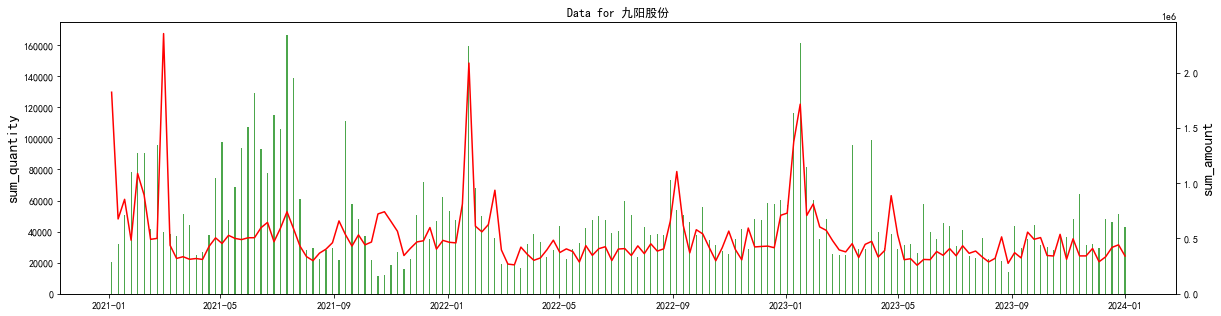

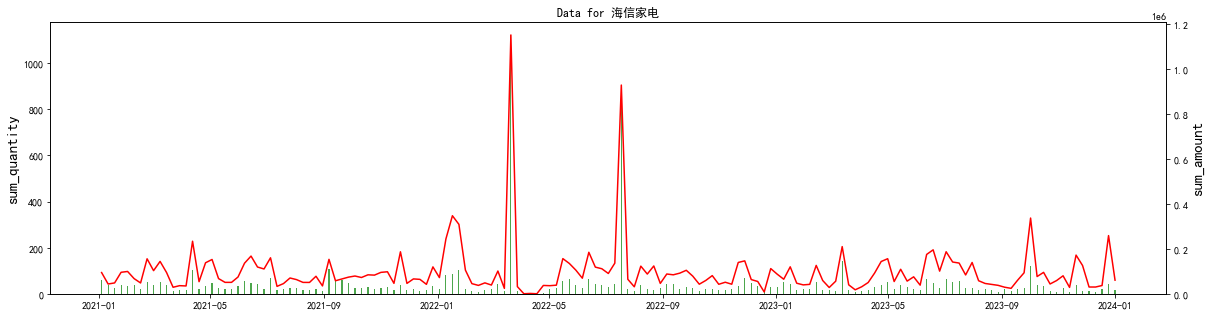

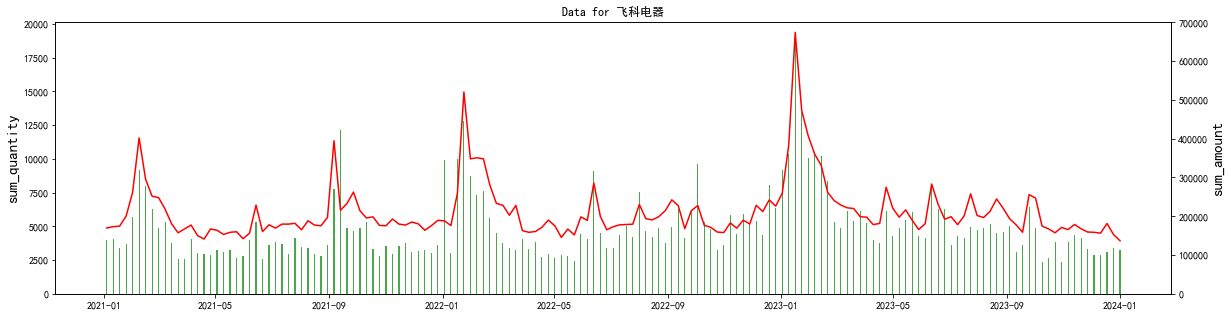

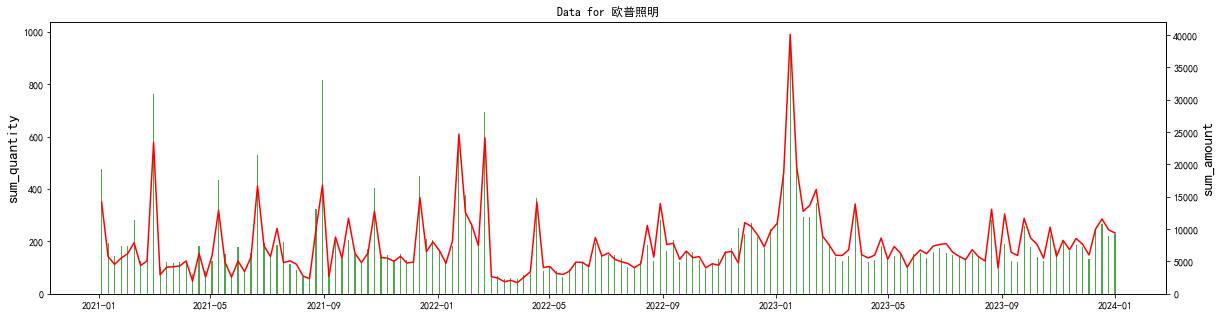

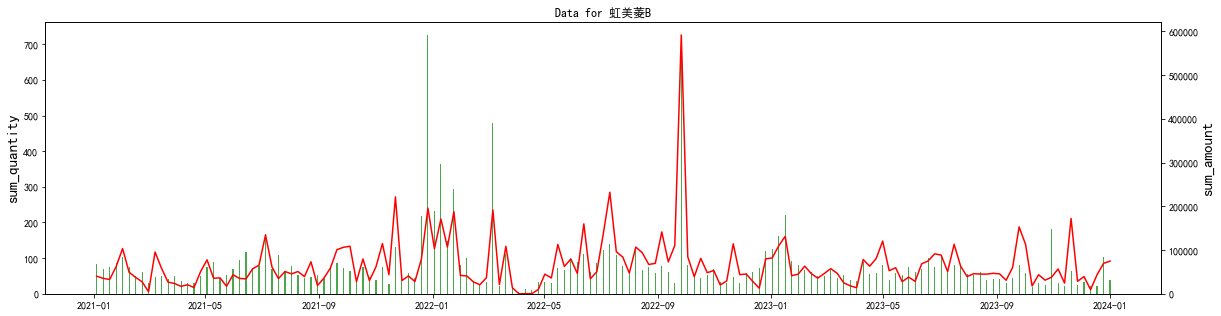

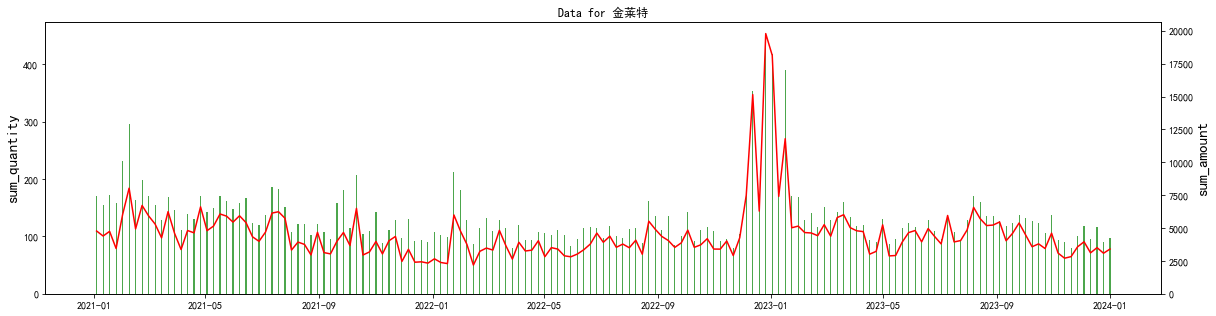

In [31]:
for shortname in common_elements:
    symbol_data = data_final[data_final['shortname'] == shortname]
    plt.rcParams['figure.figsize'] = (20,5)
    fig = plt.figure()
    #画柱形图
    ax1 = fig.add_subplot(111)
    ax1.bar(symbol_data.to_numpy().T[1], symbol_data.to_numpy().T[5],label='sum_quantity',alpha=.7,color='g',width=1.2)
    ax1.set_ylabel('sum_quantity',fontsize='15')
    #ax1.set_title('数据统计',fontsize='20')
    #画折线图
    ax2 = ax1.twinx() #组合图必须加这个
    ax2.plot(symbol_data.to_numpy().T[1], symbol_data.to_numpy().T[4], label='sum_amount',color= 'r')
    ax2.set_ylabel('sum_amount',fontsize='15')
    ax2.set_ylim(bottom=0)
#     plt.subplots_adjust(wspace=0.3) 
    plt.title(f'Data for {shortname}')
    plt.xlabel('week_start_day')
    plt.xticks(rotation=45)
    plt.show()